In [ ]:
!pip install scikit-optimize
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

<ipython-input-2-b46d91121558>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Functions

In [ ]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [ ]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    ddd = pd.DataFrame({'test_lbl': test_label, 'pred_lbl':predicted_dv})
    sns.scatterplot(ddd, x='test_lbl', y='pred_lbl', color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [ ]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [ ]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [ ]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

### Load df

In [ ]:
import pickle

with open('/content/drive/My Drive/Diploma/CODE/dataset_FOREIGN_kws_oscr.pkl', 'rb') as f:
    df_kws = pickle.load(f, encoding='utf-8')

In [ ]:
df_kws.columns[:35]

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'element_uid', 'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating', 'джек', 'расследовать', 'подруга',
       'ограбление', 'катя', 'макс', 'мечтать', 'отважный'],
      dtype='object')

In [ ]:
df_kws.columns[-35:]

Index(['воришка', 'одри', 'деспотичный', 'хэл', 'шоубизнес', 'провоцировать',
       'селин', 'уолтер', 'непобедимый', 'молль', 'небывалый', 'ларри',
       'харпер', 'прихожанин', 'спецподразделение', 'сущий', 'пята',
       'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра',
       'сидень', 'беатрис', 'рыбка', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer'],
      dtype='object')

In [ ]:
df_kws.drop(columns=['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating', 'has_oscar_actor', 'has_oscar_composer',
       'has_oscar_design', 'has_oscar_director', 'has_oscar_editor',
       'has_oscar_operator', 'has_oscar_producer', 'has_oscar_writer'], axis=1, inplace=True)

In [ ]:
df_kws

,element_uid,джек,расследовать,подруга,ограбление,катя,макс,мечтать,отважный,фрэнк,...,вылечивать,землянин,рон,головоломка,крюк,чета,зебра,сидень,беатрис,рыбка
0,e785baa6-f175-42b4-9e16-4319ac7991d5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4593737e-de9c-40df-97db-fb3cf85a08ef,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11ba66db-e941-4c3a-8da6-d8900e56f8c7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ba6bec1a-3aa9-48c7-aa65-908c21627a12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,c9a2b583-f550-4eaf-aab8-43f36f06695a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10480,36e51c56-2e1c-4f27-b2a7-8dd533e40184,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10482,3778b733-3b91-40b0-a40f-a3e053d32df4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10487,0bfb5a13-50fc-48f3-b51a-a30971024651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('/content/drive/My Drive/Diploma/CODE/data/new_eng_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.shape

(8784, 40)

In [ ]:
df = df.merge(df_kws, on=['element_uid'])

In [ ]:
df.shape

(8784, 1040)

In [ ]:
df.dropna(subset=['WORLD'], inplace=True)

In [ ]:
df.shape

(4882, 1040)

In [ ]:
df.columns[-30:]

Index(['рваться', 'ханна', 'отпор', 'воришка', 'одри', 'деспотичный', 'хэл',
       'шоубизнес', 'провоцировать', 'селин', 'уолтер', 'непобедимый', 'молль',
       'небывалый', 'ларри', 'харпер', 'прихожанин', 'спецподразделение',
       'сущий', 'пята', 'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк',
       'чета', 'зебра', 'сидень', 'беатрис', 'рыбка'],
      dtype='object')

# Preprocessing

In [ ]:
prep_df = df.copy(deep=True)

In [ ]:
prep_df.shape

(4882, 1040)

In [ ]:
prep_df.isna().sum()

age_access_type     0
name                0
director            3
genre               0
average_rating     53
                   ..
чета                0
зебра               0
сидень              0
беатрис             0
рыбка               0
Length: 1040, dtype: int64

### filter by year

In [ ]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

In [ ]:
prep_df.shape

(4017, 1040)

In [ ]:
prep_df.isna().sum()

age_access_type     0
name                0
director            0
genre               0
average_rating     53
                   ..
чета                0
зебра               0
сидень              0
беатрис             0
рыбка               0
Length: 1040, dtype: int64

### topN

In [ ]:
import ast

columns = ['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
                      'OPERATOR', 'PRODUCER', 'WRITER', 'country', 'genre']
for col in columns:
    prep_df[col] = prep_df[col].apply(lambda x: ast.literal_eval(x) if not isinstance(x, float) else np.nan)

In [ ]:
prep_df.dropna(subset=['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR', 'OPERATOR', 'PRODUCER', 'WRITER'],
              inplace=True)

In [ ]:
prep_df.shape

(3380, 1071)

In [ ]:
prep_df.isna().sum()[:20]

age_access_type     0
name                0
director            0
genre               0
average_rating     30
type                0
country             0
release_type        0
release_year        0
duration            0
actor               0
element_uid         0
ACTOR               0
COMPOSER            0
DESIGN              0
DIRECTOR            0
EDITOR              0
OPERATOR            0
PRODUCER            0
WRITER              0
dtype: int64

In [ ]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]

    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [ ]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [ ]:
prep_df.columns

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration',
       ...
       'вылечивать', 'землянин', 'рон', 'головоломка', 'крюк', 'чета', 'зебра',
       'сидень', 'беатрис', 'рыбка'],
      dtype='object', length=1040)

In [ ]:
top10genres, name = add_topN_feature(prep_df, 'genre', 10)
prep_df = ohe_topN_features(prep_df, top10genres, name)

top5countries, name = add_topN_feature(prep_df, 'country', 5)
prep_df = ohe_topN_features(prep_df, top5countries, name)

top10actors, name = add_topN_feature(prep_df, 'ACTOR', 10)
prep_df = ohe_topN_features(prep_df, top10actors, name)

top3directors, name = add_topN_feature(prep_df, 'COMPOSER', 3)
prep_df = ohe_topN_features(prep_df, top3directors, name)

top2DESIGN, name = add_topN_feature(prep_df, 'DESIGN', 2)
prep_df = ohe_topN_features(prep_df, top2DESIGN, name)

top2DIRECTOR, name = add_topN_feature(prep_df, 'DIRECTOR', 2)
prep_df = ohe_topN_features(prep_df, top2DIRECTOR, name)

top2EDITOR, name = add_topN_feature(prep_df, 'EDITOR', 2)
prep_df = ohe_topN_features(prep_df, top2EDITOR, name)

top2OPERATOR, name = add_topN_feature(prep_df, 'OPERATOR', 2)
prep_df = ohe_topN_features(prep_df, top2OPERATOR, name)

top3PRODUCER, name = add_topN_feature(prep_df, 'PRODUCER', 3)
prep_df = ohe_topN_features(prep_df, top3PRODUCER, name)

top2WRITER, name = add_topN_feature(prep_df, 'WRITER', 2)
prep_df = ohe_topN_features(prep_df, top2WRITER, name)

In [ ]:
prep_df.head().T

,4,11,16,19,20
age_access_type,6,16,16,12,12
name,Пламенное сердце,Звездный путь,Стартрек: Бесконечность,Звёздный путь: Возмездие,Стартрек: Возмездие
director,"['40f78e6d-3c9f-434f-a505-c6ffdd045763', '3321...",['5a7ba90d-25b5-40ed-aa38-c923850c254c'],['d4ecb571-a231-4d94-8c78-1f84e674c53e'],['d463cdfe-1e75-40d6-b185-bfedf51fdf56'],['5a7ba90d-25b5-40ed-aa38-c923850c254c']
average_rating,6.4,7.75,6.9,6.71,7.63
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
...,...,...,...,...,...
Харви Вайнштейн,0,0,0,0,0
Боб Вайнштейн,0,0,0,0,0
Арнон Милчен,0,0,0,0,0
Люк Бессон,0,0,0,0,0


In [ ]:
prep_df.columns

Index(['age_access_type', 'name', 'director', 'average_rating', 'type',
       'release_type', 'release_year', 'duration', 'actor', 'element_uid',
       ...
       'Стивен Спилберг', 'Крис Гилл', 'Майкл Кан', 'Дариуш Вольски',
       'Роджер Дикинс', 'Харви Вайнштейн', 'Боб Вайнштейн', 'Арнон Милчен',
       'Люк Бессон', 'Стэн Ли'],
      dtype='object', length=1071)

In [ ]:
prep_df.columns[:30]

Index(['age_access_type', 'name', 'director', 'average_rating', 'type',
       'release_type', 'release_year', 'duration', 'actor', 'element_uid',
       'BUDGET', 'MARKETING', 'RUS', 'USA', 'WORLD', 'element_id', 'rating',
       'has_oscar_actor', 'has_oscar_composer', 'has_oscar_design',
       'has_oscar_director', 'has_oscar_editor', 'has_oscar_operator',
       'has_oscar_producer', 'has_oscar_writer', 'poster_url',
       'poster_url_preview', 'has_imax', 'has_3_d', 'has_sequel'],
      dtype='object')

In [ ]:
prep_df.drop(['director', 'average_rating', 'release_type', 'actor', 'element_id', 'rating'], axis=1, inplace=True)

In [ ]:
skewed_num_features = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA'] 

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

class Preprocesser:
    def __init__(self, 
#                 mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
#                 mltpl_cat_n_top: dict
                ):
#         self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
#         self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
#         df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [ ]:
preprocesser = Preprocesser(
#     mltpl_cat_features,
            skewed_num_features,
            #text_features,
#             mltpl_cat_n_top
                           )

In [ ]:
df_pr = preprocesser.preprocess(prep_df)

In [ ]:
df_pr.isnull().sum()

age_access_type    0
name               0
type               0
release_year       0
duration           0
                  ..
Харви Вайнштейн    0
Боб Вайнштейн      0
Арнон Милчен       0
Люк Бессон         0
Стэн Ли            0
Length: 1065, dtype: int64

### target destr

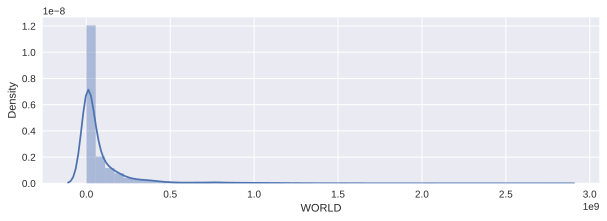

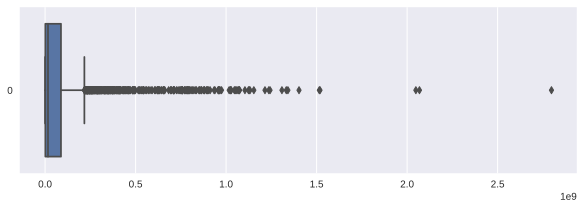

In [ ]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['WORLD'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['WORLD'].values, orient='h')
plt.show()

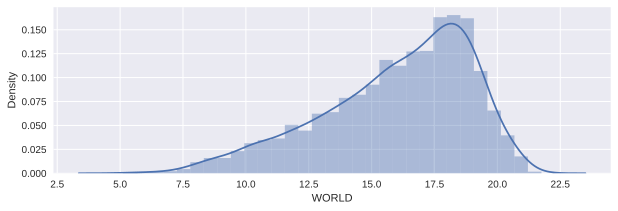

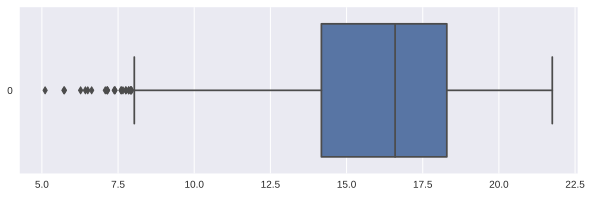

In [ ]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['WORLD'].apply(lambda x: np.log1p(x)))
plt.show()

plt.figure(figsize=(10, 3))
x = df_pr['WORLD'].apply(lambda x: np.log1p(x))
sns.boxplot(x.values, orient='h')
plt.show()

## Split

In [ ]:
df_pr.columns

Index(['age_access_type', 'name', 'type', 'release_year', 'duration',
       'element_uid', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       ...
       'Стивен Спилберг', 'Крис Гилл', 'Майкл Кан', 'Дариуш Вольски',
       'Роджер Дикинс', 'Харви Вайнштейн', 'Боб Вайнштейн', 'Арнон Милчен',
       'Люк Бессон', 'Стэн Ли'],
      dtype='object', length=1065)

In [ ]:
from sklearn.model_selection import train_test_split

sorted_df = df_pr.sort_values('release_year')

test = sorted_df[sorted_df['release_year'] == 2022]
train = sorted_df[sorted_df['release_year'] != 2022]

# for looking at samples
test_df = test.copy(deep=True)
train_df = train.copy(deep=True)

test.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)
train.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)


X_test, y_test = test.drop('WORLD', axis=1), test['WORLD']
y_test = y_test.apply(lambda x: np.log1p(x))

X, y = train.drop('WORLD', axis=1), train['WORLD']
y = y.apply(lambda x: np.log1p(x))
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.1, 
                                                  shuffle=False)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((3019, 1061), (336, 1061), (25, 1061), (3019,), (336,), (25,))

In [ ]:
X_train.columns[:40]

Index(['age_access_type', 'type', 'duration', 'BUDGET', 'MARKETING', 'RUS',
       'USA', 'has_oscar_actor', 'has_oscar_composer', 'has_oscar_design',
       'has_oscar_director', 'has_oscar_editor', 'has_oscar_operator',
       'has_oscar_producer', 'has_oscar_writer', 'poster_url',
       'poster_url_preview', 'has_imax', 'has_3_d', 'has_sequel', 'джек',
       'расследовать', 'подруга', 'ограбление', 'катя', 'макс', 'мечтать',
       'отважный', 'фрэнк', 'воспитывать', 'супергерой', 'безжалостный',
       'маньяк', 'эксцентричный', 'одержимый', 'влюбляться', 'капитан',
       'приключение', 'плен', 'городок'],
      dtype='object')

In [ ]:
X_train.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_val.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)
X_test.drop(columns=['poster_url', 'poster_url_preview'], axis=1, inplace=True)

In [ ]:
cat_features = ['age_access_type', 'type']

In [ ]:
# sc
from sklearn.preprocessing import StandardScaler

sc_cols = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'USA']

sc=StandardScaler()
sc_train = sc.fit_transform(X_train[sc_cols])

sc_train = pd.DataFrame(sc_train, index=X_train.index, columns=sc_cols)
X_train.drop(sc_cols, axis=1, inplace=True)
print(X_train.shape)
X_train = pd.concat([X_train, sc_train],axis=1)
print(X_train.shape)

# 
sc_val = sc.transform(X_val[sc_cols])
sc_val = pd.DataFrame(sc_val, index=X_val.index, columns=sc_cols)
X_val.drop(sc_cols, axis=1, inplace=True)
print(X_val.shape)
X_val = pd.concat([X_val, sc_val],axis=1) 
print(X_val.shape)

# 
sc_test = sc.transform(X_test[sc_cols])
sc_test = pd.DataFrame(sc_test, index=X_test.index, columns=sc_cols)
X_test.drop(sc_cols, axis=1, inplace=True)
print(X_test.shape)
X_test = pd.concat([X_test, sc_test],axis=1) 
print(X_test.shape)

(3019, 1054)
(3019, 1059)
(336, 1054)
(336, 1059)
(25, 1054)
(25, 1059)


# Modeling

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [ ]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.060567
0:	learn: 2.2090547	test: 2.8709679	best: 2.8709679 (0)	total: 71.5ms	remaining: 1m 11s
100:	learn: 0.7458890	test: 1.2196015	best: 1.2196015 (100)	total: 1.18s	remaining: 10.5s
200:	learn: 0.6942381	test: 1.1978433	best: 1.1953811 (165)	total: 2.36s	remaining: 9.39s
300:	learn: 0.6691529	test: 1.1967445	best: 1.1953811 (165)	total: 3.3s	remaining: 7.67s
400:	learn: 0.6392206	test: 1.1921464	best: 1.1900122 (362)	total: 4.3s	remaining: 6.43s
500:	learn: 0.6149909	test: 1.1906083	best: 1.1900122 (362)	total: 5.23s	remaining: 5.21s
600:	learn: 0.5958034	test: 1.1922902	best: 1.1900122 (362)	total: 6.17s	remaining: 4.09s
700:	learn: 0.5729476	test: 1.1853563	best: 1.1849457 (693)	total: 7.13s	remaining: 3.04s
800:	learn: 0.5551484	test: 1.1891337	best: 1.1840611 (722)	total: 8.07s	remaining: 2s
900:	learn: 0.5383663	test: 1.1895941	best: 1.1840611 (722)	total: 9.21s	remaining: 1.01s
999:	learn: 0.5223374	test: 1.1922204	best: 1.1840611 (722)	total: 10.2s	rema

In [ ]:
y_pred = cat_model.predict(test_dataset)

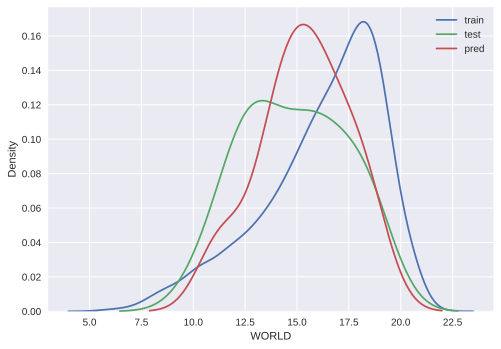

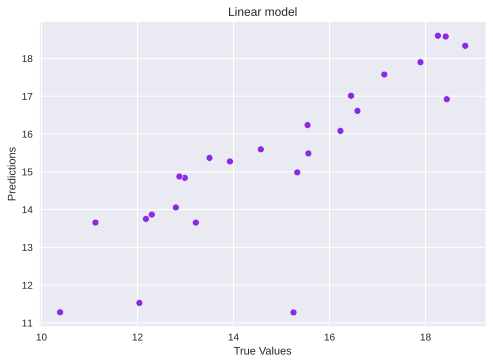

In [ ]:
target_distr_linear(y_train, y_test, y_pred)   

In [ ]:
def inverse_transform(feature):
    return np.expm1(feature)

calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   469922020905797.4
RMSE:  21677684.86037652
R2:    0.7142174651157502
MAE:   9980682.796783615
MedAE: 2348491.41313115
------------------------------


In [ ]:
errors

7017   -1.854598
3892   -0.893280
2836   -0.345245
6010   -1.867122
5886   -2.531491
5381   -2.001639
5330   -0.439457
5044    0.491436
4920    1.521845
4483   -0.564956
4463   -0.029857
4406   -1.258196
1020    0.511594
4405    3.974387
4380   -1.570133
4378   -0.005836
4332   -1.026086
6721    0.144525
6730    0.344737
3359   -1.577126
3356   -0.160865
6892    0.075033
3078   -0.432848
4381   -1.349165
4      -0.693715
Name: WORLD, dtype: float64

In [ ]:
# errors = y_test - y_pred
# draw_res_analys(errors.values, y_pred)

TypeError: ignored

**Conclusion**
* The trend in the second figure is not visible, now we will confirm the presence of heteroskedasticity on tests.

In [ ]:
test_df['PREDS'] = y_pred.tolist()
test_df['TARGET'] = y_test.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Майкл Кан,Дариуш Вольски,Роджер Дикинс,Харви Вайнштейн,Боб Вайнштейн,Арнон Милчен,Люк Бессон,Стэн Ли,PREDS,TARGET
7017,16,Скрежет,MOVIE,2022,15.501910,ec7d1007-7597-4c93-8abb-1c04bcaf71ab,NaN,NaN,12.265002,12.116837,...,0,0,0,0,0,0,0,0,14.839498,12.984900
3892,18,Заговор в Голливуде,MOVIE,2022,15.576811,3660bc65-41cc-4e2c-82e7-8c9af726b387,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,11.280243,10.386963
2836,12,Лулу и Бриггс,MOVIE,2022,15.617221,1504acff-36a2-4886-b37e-b4a96d51d3f6,NaN,NaN,15.155431,17.939059,...,0,0,0,0,0,0,0,0,18.602420,18.257175
6010,16,Вечеринка на вылет,MOVIE,2022,15.646491,df5d6fc7-003f-4596-aa08-4faa796510ca,NaN,NaN,12.183014,NaN,...,0,0,0,0,0,0,0,0,15.366948,13.499825
5886,18,Горячий отпуск,MOVIE,2022,15.646491,e240cb55-9a8f-44ee-b8ff-18922b2403d2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,13.655425,11.123934
5381,16,Любовь как бестселлер,MOVIE,2022,15.627073,d8f4e60a-a1a1-4509-8bb2-d5c8822f4440,NaN,NaN,11.503441,NaN,...,0,0,0,0,0,0,0,0,14.874361,12.872722
5330,18,Невидимый убийца,MOVIE,2022,15.684231,0d14e4b4-71ed-4409-9ebb-54a130e913c8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,13.654048,13.214591
5044,16,RRR: Рядом ревет революция,MOVIE,2022,16.200597,1dbd646f-1c33-4584-b411-efc9da56c702,18.049617,NaN,10.485982,16.446375,...,0,0,0,0,0,0,0,0,18.335521,18.826957
4920,16,Криминальный город 2,MOVIE,2022,15.656060,22c6ce19-c340-4a96-85a3-adad8b26d2e3,16.012735,NaN,NaN,13.608314,...,0,0,0,0,0,0,0,0,16.919970,18.441815
4483,18,Флешбэк,MOVIE,2022,15.729488,50adaca1-09c0-41e9-b6cc-b9200c734661,NaN,NaN,13.978818,15.807356,...,0,0,0,0,0,0,0,0,17.012722,16.447766


### Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 13.3 MB/s eta 0:00:00


In [ ]:
from catboost import Pool
import shap

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=cat_features))

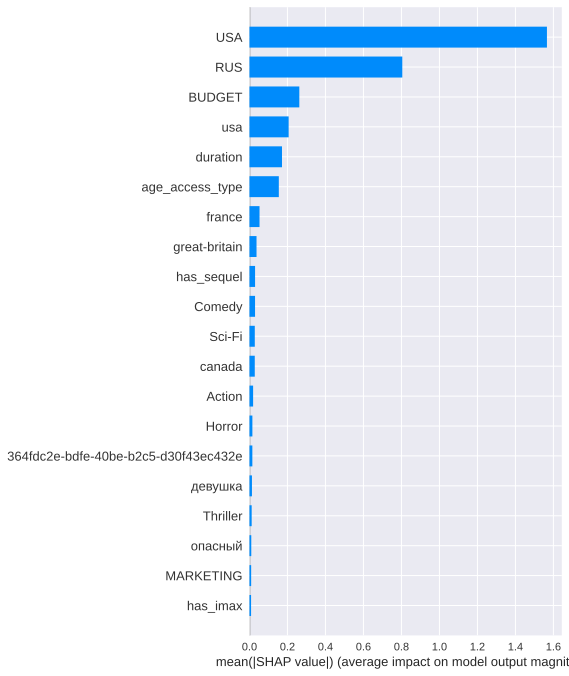

In [ ]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

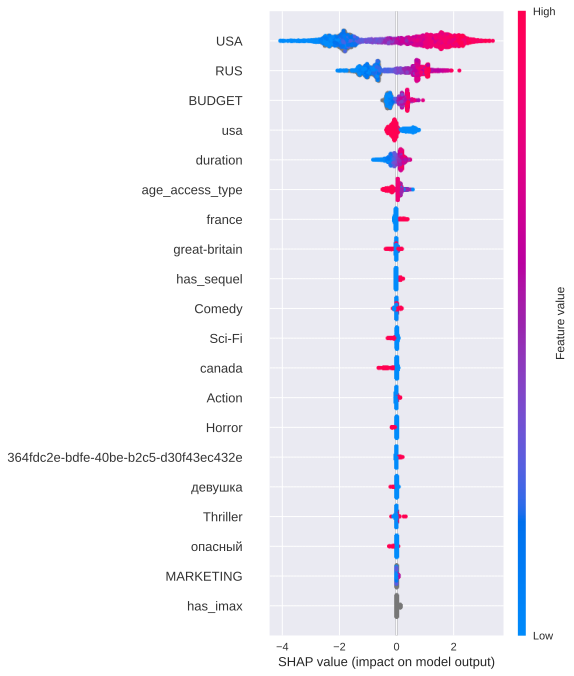

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

# Tuning

In [ ]:
train_dataset = cat.Pool(X_train, y_train, 
                         cat_features=cat_features) 

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [ ]:
parameters_distr = {'depth': randint(5, 10),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [5000, 10000, 15000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_okko_rat_ntop_scrs_kws_world', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 2.1410815	total: 47.5ms	remaining: 3m 57s
1:	learn: 1.9875328	total: 95.7ms	remaining: 3m 59s
2:	learn: 1.8463372	total: 154ms	remaining: 4m 17s
3:	learn: 1.7229554	total: 201ms	remaining: 4m 11s
4:	learn: 1.6093411	total: 258ms	remaining: 4m 17s
5:	learn: 1.5099104	total: 304ms	remaining: 4m 13s
6:	learn: 1.4271280	total: 351ms	remaining: 4m 10s
7:	learn: 1.3473110	total: 407ms	remaining: 4m 13s
8:	learn: 1.2857647	total: 452ms	remaining: 4m 10s
9:	learn: 1.2271921	total: 502ms	remaining: 4m 10s
10:	learn: 1.1766213	total: 557ms	remaining: 4m 12s
11:	learn: 1.1336604	total: 638ms	remaining: 4m 25s
12:	learn: 1.0938509	total: 684ms	remaining: 4m 22s
13:	learn: 1.0538849	total: 731ms	remaining: 4m 20s
14:	learn: 1.0167609	total: 778ms	remaining: 4m 18s
15:	learn: 0.9864934	total: 825ms	remaining: 4m 17s
16:	learn: 0.9621760	total: 883ms	remaining: 4m 18s
17:	learn: 0.9381282	total: 930ms	remaining: 4m 17s
18:	

{'depth': 9, 'iterations': 5000, 'learning_rate': 0.09904597337857143}

In [ ]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 9, 'iterations': 5000, 'learning_rate': 0.09904597337857143}

In [ ]:
grid.best_score_

0.7650141761787383

In [ ]:
best_cat.save_model('parsed_ratings_okko_tune_ntop_scrs_kws_world')

In [ ]:
y_pred = best_cat.predict(test_dataset)

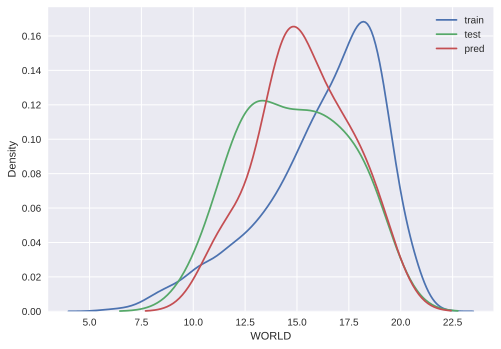

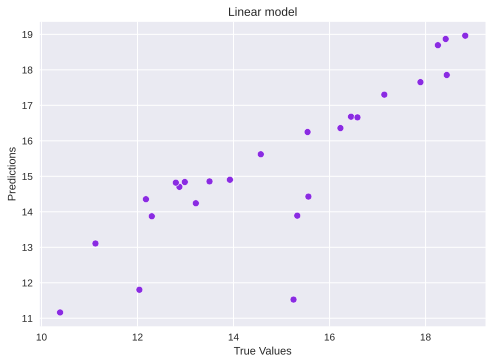

In [ ]:
target_distr_linear(y_train, y_test, y_pred)  

In [ ]:
calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   329239287159574.06
RMSE:  18144952.112352736
R2:    0.7997735073436613
MAE:   9197367.54733694
MedAE: 2370708.5102547053
------------------------------


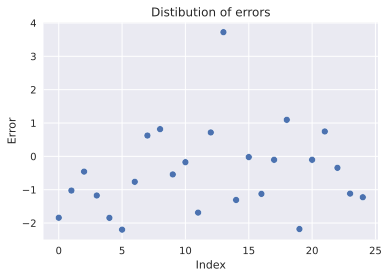

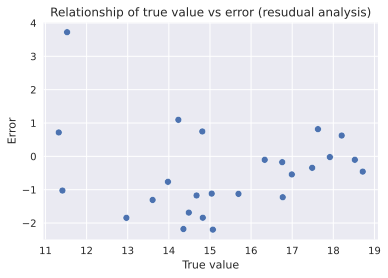

In [ ]:
# errors = y_test - y_pred
# draw_res_analys(errors, y_pred)

In [ ]:
test_df['PREDS_tune'] = y_pred.tolist()
test_df

,age_access_type,name,type,release_year,duration,element_uid,BUDGET,MARKETING,RUS,USA,...,Дариуш Вольски,Роджер Дикинс,Харви Вайнштейн,Боб Вайнштейн,Арнон Милчен,Люк Бессон,Стэн Ли,PREDS,TARGET,PREDS_tune
7017,16,Скрежет,MOVIE,2022,15.501910,ec7d1007-7597-4c93-8abb-1c04bcaf71ab,NaN,NaN,12.265002,12.116837,...,0,0,0,0,0,0,0,14.839498,12.984900,14.838636
3892,18,Заговор в Голливуде,MOVIE,2022,15.576811,3660bc65-41cc-4e2c-82e7-8c9af726b387,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,11.280243,10.386963,11.163552
2836,12,Лулу и Бриггс,MOVIE,2022,15.617221,1504acff-36a2-4886-b37e-b4a96d51d3f6,NaN,NaN,15.155431,17.939059,...,0,0,0,0,0,0,0,18.602420,18.257175,18.694029
6010,16,Вечеринка на вылет,MOVIE,2022,15.646491,df5d6fc7-003f-4596-aa08-4faa796510ca,NaN,NaN,12.183014,NaN,...,0,0,0,0,0,0,0,15.366948,13.499825,14.855698
5886,18,Горячий отпуск,MOVIE,2022,15.646491,e240cb55-9a8f-44ee-b8ff-18922b2403d2,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,13.655425,11.123934,13.106738
5381,16,Любовь как бестселлер,MOVIE,2022,15.627073,d8f4e60a-a1a1-4509-8bb2-d5c8822f4440,NaN,NaN,11.503441,NaN,...,0,0,0,0,0,0,0,14.874361,12.872722,14.702916
5330,18,Невидимый убийца,MOVIE,2022,15.684231,0d14e4b4-71ed-4409-9ebb-54a130e913c8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,13.654048,13.214591,14.240438
5044,16,RRR: Рядом ревет революция,MOVIE,2022,16.200597,1dbd646f-1c33-4584-b411-efc9da56c702,18.049617,NaN,10.485982,16.446375,...,0,0,0,0,0,0,0,18.335521,18.826957,18.961896
4920,16,Криминальный город 2,MOVIE,2022,15.656060,22c6ce19-c340-4a96-85a3-adad8b26d2e3,16.012735,NaN,NaN,13.608314,...,0,0,0,0,0,0,0,16.919970,18.441815,17.854551
4483,18,Флешбэк,MOVIE,2022,15.729488,50adaca1-09c0-41e9-b6cc-b9200c734661,NaN,NaN,13.978818,15.807356,...,0,0,0,0,0,0,0,17.012722,16.447766,16.679515


In [ ]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    imp_features_df = pd.DataFrame({"score":imp, "feat": model.feature_names_})
    imp_features_df = imp_features_df.sort_values(by='score')[-20:]

    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp_features_df['score'].values, y=imp_features_df["feat"].values)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

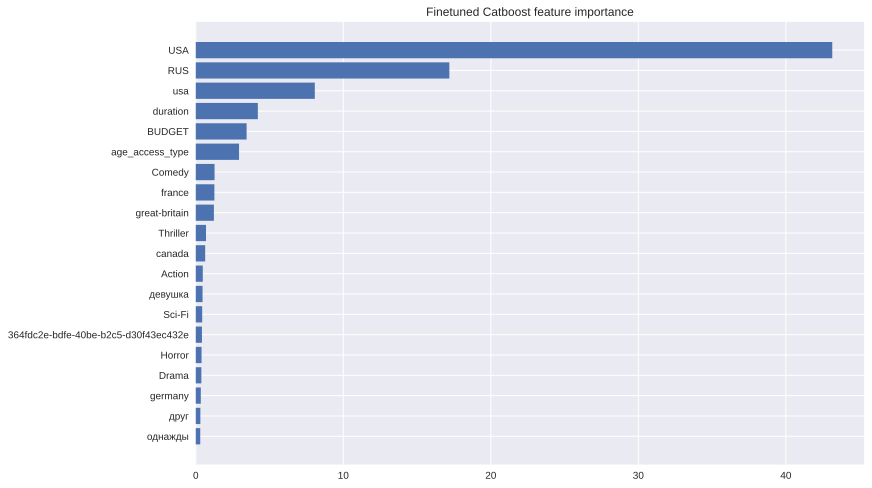

In [ ]:
get_feature_imp(best_cat, train_dataset)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(best_cat)
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=cat_features))

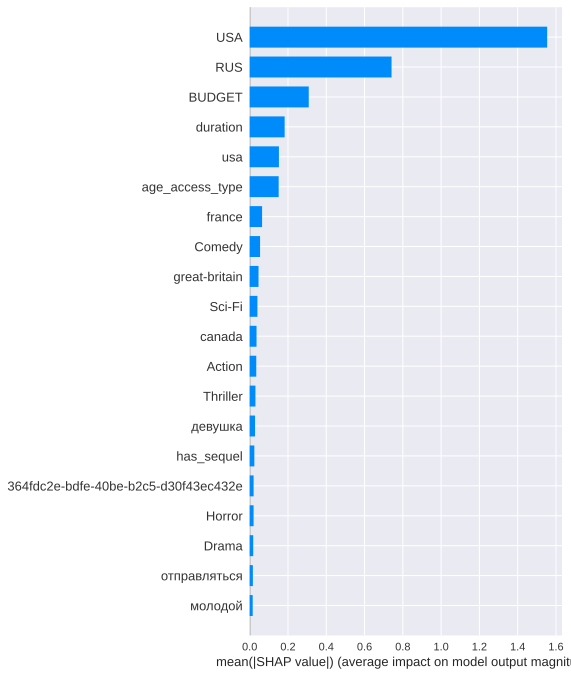

In [ ]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

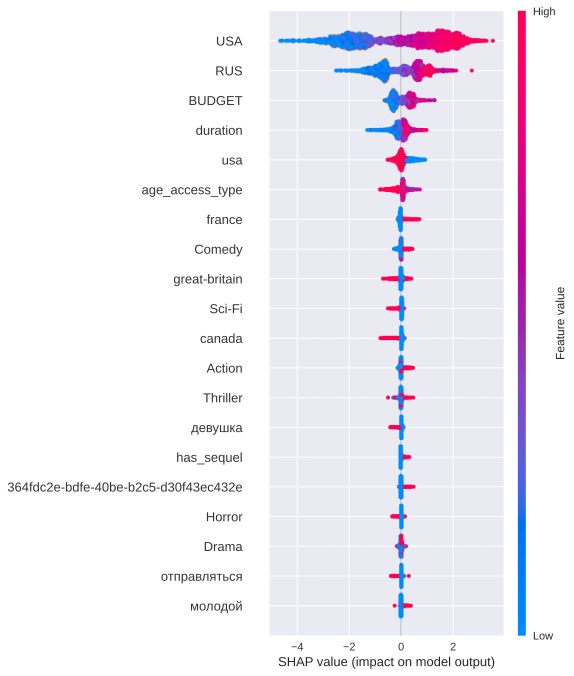

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)